In [1]:
#libraries 
import pandas as pd
import gzip
from tqdm import tqdm

from datetime import datetime
from datetime import date, time
from dateutil.parser import parse
import numpy as np



from bokeh.plotting import figure, output_notebook, show,output_file,gridplot
from bokeh.models import DatetimeTickFormatter,HoverTool,Span

import json
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [17]:
def distribution (rev):
    data=df.loc[rev]
    print(len(data))
    print(data.iloc[0,9:12])
    plt.figure(figsize=(15,10))
    
    plt.subplot(3,2,1)
    w= np.ones_like(data['overall'])/float(len(data['overall']))
    plt.hist(data['overall'],weights=w)
    plt.title('overall score')
    plt.grid()
    
    plt.subplot(3,2,2)
    w= np.ones_like(data.length_review)/float(len(data.length_review))
    plt.hist(data['length_review'],weights=w)
    plt.grid()
    plt.title('length of reviews')
    
    plt.subplot(3,2,5)
    w= np.ones_like(data.sentiment_review)/float(len(data.sentiment_review))
    plt.hist(data['sentiment_review'],weights=w)
    plt.grid()
    plt.title('sentiment review')
    
    plt.subplot(3,2,6)
    w= np.ones_like(data.sentiment_summary)/float(len(data.sentiment_summary))
    plt.hist(data['sentiment_summary'],weights=w)
    plt.grid()
    plt.title('sentiment summary')
    
    plt.subplot(3,2,3)
    w= np.ones_like(data.helpfulness.dropna())/float(len(data.helpfulness.dropna()))
    plt.hist(data['helpfulness'].dropna(),weights=w)
    plt.grid()
    plt.title('helpfulness')
    
    plt.subplot(3,2,4)
    w= np.ones_like(data.year)/float(len(data.year))
    plt.hist(data['year'],weights=w)
    plt.grid()
    plt.title('year')
    
    plt

import itertools
def plot_correlation_matrix(cm, classes,title='Correlation matrix', cmap=plt.cm.RdBu):
    normalize=False
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.clim(-1,1)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

             
np.set_printoptions(precision=2)

def corr (x,y,c):
    p.circle(X[x],X[y],color=c,alpha=0.5)
    p.legend.location = "top_left"
    p.grid.grid_line_alpha=0
    p.xaxis.axis_label = x
    p.yaxis.axis_label = y
    return p


In [3]:
#load the dataframe for a given product only (is it possible?)
pickle_off = open("Movies_and_and_merged.pickle","rb")
df = pickle.load(pickle_off)


In [4]:
df=df[df.year>2012]
df.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime', 'year',
       'length_review', 'length_title_reviews', 'title', 'price',
       'sales_category', 'sales_rank', 'sentiment_review',
       'sentiment_summary'],
      dtype='object')

In [5]:
l=[]
for i in df.index:
    if df.helpful[i][1]==0:
        l.append(None)
    else:
        l.append(df.helpful[i][0]/df.helpful[i][1])
df['helpfulness']=l
del df['helpful']
del df['unixReviewTime']
df['sales_rank']=df['sales_rank'].replace(0, np.nan)

In [6]:
df=df.set_index('asin')

In [7]:
df.columns

Index(['reviewerID', 'reviewerName', 'reviewText', 'overall', 'summary',
       'reviewTime', 'year', 'length_review', 'length_title_reviews', 'title',
       'price', 'sales_category', 'sales_rank', 'sentiment_review',
       'sentiment_summary', 'helpfulness'],
      dtype='object')

In [8]:
products=df.index.unique()
len(products)

43500

In [9]:
n=list(map(lambda x:len(df.loc[x]),products))

In [10]:
count=pd.DataFrame(n)
count.index=products
count.columns=['n']
count=count.sort_values('n',ascending=False)

In [11]:
count.head(10)

,n
asin,
B009934S5M,1974
B0059XTU1S,1696
B005LAIIMG,1584
B00AF6B22E,1525
B00FZM8Z7I,1517
B00H83EUL2,1494
B003EYVXV4,1396
1608838137,1346
B008JFUPFI,1281


In [42]:
p=count.index.values[4]
X=df.loc[p,['overall','helpfulness','length_review','length_title_reviews','sentiment_review','sentiment_summary']]
X.head()

,overall,helpfulness,length_review,length_title_reviews,sentiment_review,sentiment_summary
asin,,,,,,
B00FZM8Z7I,5.0,1.0,459,9,0.471111,0.4
B00FZM8Z7I,5.0,NaN,155,31,0.400000,1.0
B00FZM8Z7I,4.0,NaN,1634,53,0.184664,0.5
B00FZM8Z7I,5.0,NaN,156,11,0.237500,0.8
B00FZM8Z7I,4.0,NaN,154,31,0.600000,0.5


1517
title                     NaN
price                   59.93
sales_category    Movies & TV
Name: B00FZM8Z7I, dtype: object


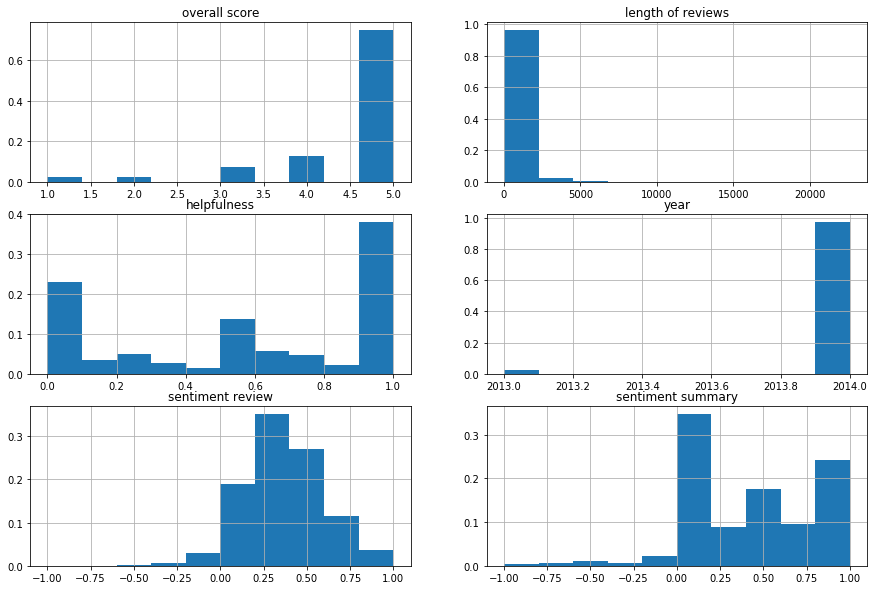

In [43]:
distribution(p)

In [44]:
cm=X.corr()
cm

,overall,helpfulness,length_review,length_title_reviews,sentiment_review,sentiment_summary
overall,1.000000,0.463204,-0.135599,-0.123294,0.386913,0.307145
helpfulness,0.463204,1.000000,0.102810,0.061764,0.136420,0.241118
length_review,-0.135599,0.102810,1.000000,0.330084,-0.211808,-0.081816
length_title_reviews,-0.123294,0.061764,0.330084,1.000000,-0.224879,-0.070210
sentiment_review,0.386913,0.136420,-0.211808,-0.224879,1.000000,0.204463
sentiment_summary,0.307145,0.241118,-0.081816,-0.070210,0.204463,1.000000


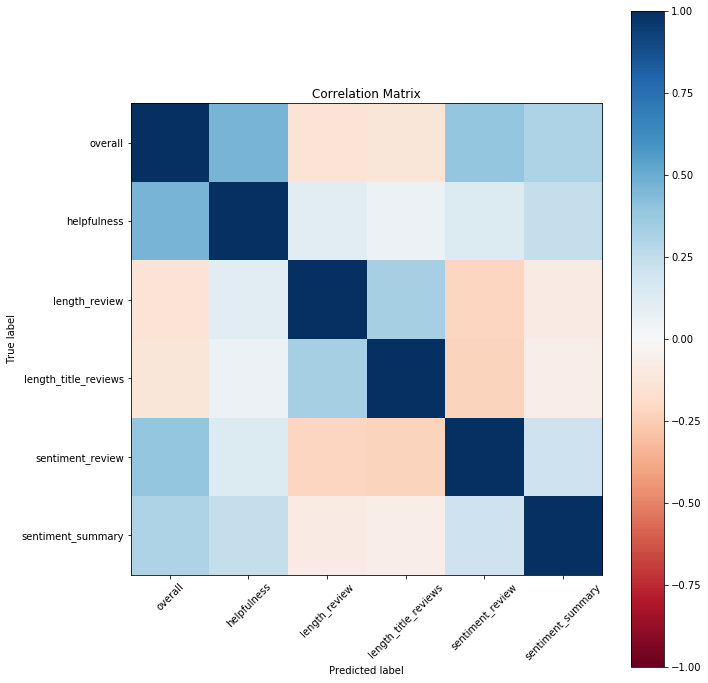

In [45]:
# Plot correlation matrix
plt.figure(figsize=(10,10))
plot_correlation_matrix(cm, classes=X.columns,title='Correlation Matrix')
plt.show()              

In [46]:
output_notebook()
p = figure(width=1000, height=500)
p=corr('length_review','sentiment_review','navy')
p=corr('length_review','sentiment_summary','red')
show(p)

Loading BokehJS ...

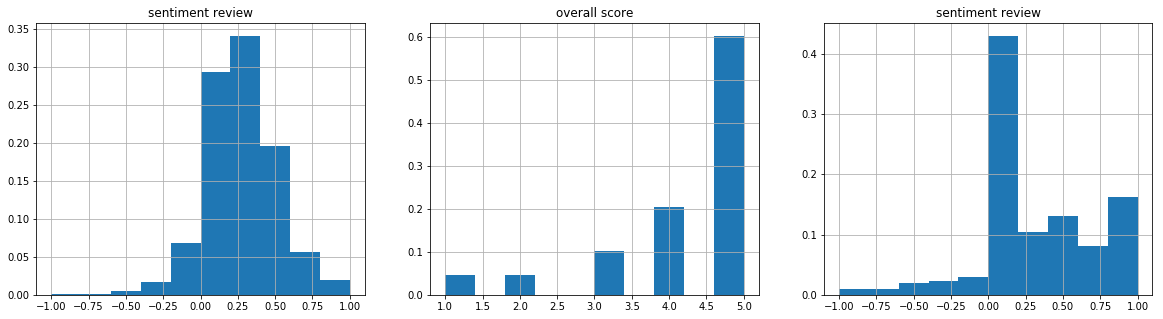

In [71]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
w= np.ones_like(df.sentiment_review)/float(len(df.sentiment_review))
plt.hist(df.sentiment_review,weights=w)
plt.title('sentiment review')
plt.grid()
plt.subplot(1,3,2)
w= np.ones_like(df.overall)/float(len(df.overall))
plt.hist(df.overall,weights=w)
plt.title('overall score')
plt.grid()
plt.subplot(1,3,3)
w= np.ones_like(df.sentiment_summary)/float(len(df.sentiment_summary))
plt.hist(df.sentiment_summary,weights=w)
plt.title('sentiment review')
plt.grid()

In [92]:
score=df.groupby('overall').mean()

Text(0.5,1,'length of the review')

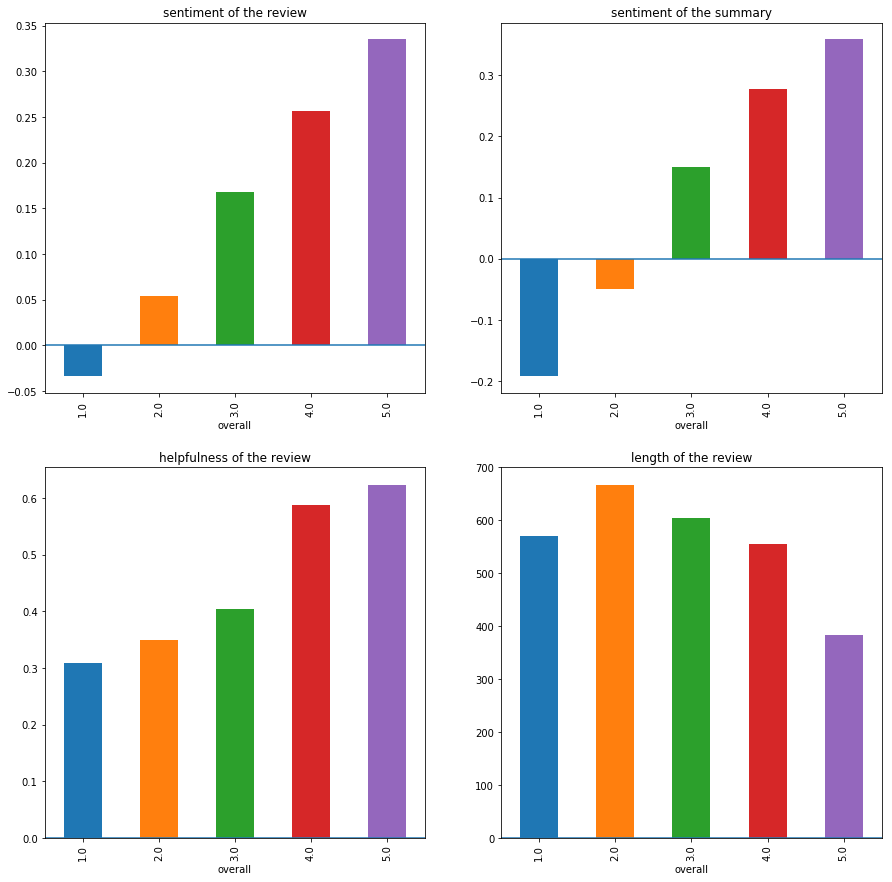

In [93]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
score['sentiment_review'].plot.bar()
plt.axhline(y=0, xmin=0, xmax=1, hold=None)
plt.title('sentiment of the review')
plt.subplot(2,2,2)
score['sentiment_summary'].plot.bar()
plt.axhline(y=0, xmin=0, xmax=1, hold=None)
plt.title('sentiment of the summary')
plt.subplot(2,2,3)
score['helpfulness'].plot.bar()
plt.axhline(y=0, xmin=0, xmax=1, hold=None)
plt.title('helpfulness of the review')
plt.subplot(2,2,4)
score['length_review'].plot.bar()
plt.axhline(y=0, xmin=0, xmax=1, hold=None)
plt.title('length of the review')

Text(0.5,1,'price of the product')

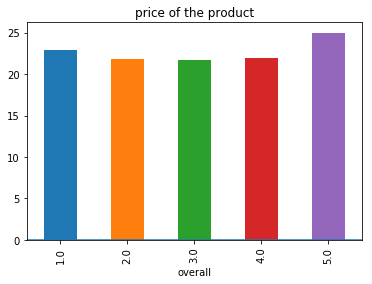

In [94]:
score['price'].plot.bar()
plt.axhline(y=0, xmin=0, xmax=1, hold=None)
plt.title('price of the product')